In [33]:
import pandas as pd
import numpy as np
from univariate import univar
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [34]:
#To remove "sl_no" column from dataset
dataset.drop("sl_no", inplace=True, axis =1) #inplace used to make the chnage in dataset directly without storing it as separate variable

# 1) Replace the NaN values with correct value. And justify why you have chosen the same.

In [35]:
dataset.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [36]:
#Since we have null or empty values in salary only for cadidates whso have not placed, we can replace it with zero.
#That's the reason why we are not replacing with Mean/Median/Mode here. !! It is eventually based on the dataset.
#Here "inplace=True" means it directly replce the data in dataset rather storing the dataset into a new variable.
dataset['salary'].fillna(0, inplace=True)

In [37]:
#Verify again for null values. No null values are found.
dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [38]:
#Find quantitative & qualitatvive columns in dataset
quan, qual = univar.quanqual(dataset)

In [39]:
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [40]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [41]:
#For qunative data, do the decriptive analysis
descriptive = univar.univariate_table(dataset, quan)
descriptive

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
Q1:25%,60.6,60.9,61.0,60.0,57.945,0.0
Q2:50%,67.0,65.0,66.0,71.0,62.0,240000.0
Q3:75%,75.7,73.0,72.0,83.5,66.255,282500.0
99%,87.0,91.86,83.86,97.0,76.1142,629000.0
Q4:100%,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5Rule,22.65,18.15,16.5,35.25,12.465,423750.0


In [42]:
# Find the columns which have Greater & Lesser Outliers
lesser_outliers, greater_outliers=univar.find_outliers_columns(quan, descriptive)

In [43]:
lesser_outliers

['hsc_p']

In [44]:
greater_outliers

['hsc_p', 'degree_p', 'salary']

In [45]:
#Replace the outliers with lesser/greater values.
univar.replace_outliers(dataset, descriptive, lesser_outliers, greater_outliers)

C:\ARUN\HOPE AI\03_DataScience\DS Assignment\univariate.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col][dataset[col] < descriptive[col]["lesser"]]= descriptive[col]["lesser"]
C:\ARUN\HOPE AI\03_DataScience\DS Assignment\univariate.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col][dataset[col] > descriptive[col]["greater"]]= descriptive[col]["greater"]


In [46]:
#Cross verify again with above steps to see if there stil outliers present
descriptive = univar.univariate_table(dataset, quan)
lesser_outliers, greater_outliers=univar.find_outliers_columns(quan, descriptive)

In [47]:
lesser_outliers

[]

In [48]:
greater_outliers

[]

In [49]:
# All outliers are replaced.

# 2)How many of them are not placed?

In [50]:
# (1) Simple approach
not_placed_count =(dataset["status"] == "Not Placed").sum()
print(f'{not_placed_count} candidates are not placed')

67 candidates are not placed


In [51]:
# (2) 
(dataset["salary"]==0).value_counts()

False    148
True      67
Name: salary, dtype: int64

In [52]:
# (3) DS approach
#Frequency will always help to answer "Howmany". We know that Zero salary employees are not placed. So we can find frequeny of zero salary.
#Let's create Frequecny table for reference as we have function created already
frequency_table = univar.freq_table("salary", dataset)
frequency_table

,Unique_Values,Frequency,Relative_Frequecy,CumSum
0,0.0,67,0.311628,0.311628
1,300000.0,22,0.102326,0.413953
2,250000.0,18,0.083721,0.497674
3,240000.0,15,0.069767,0.567442
4,260000.0,7,0.032558,0.600000
5,360000.0,6,0.027907,0.627907
6,200000.0,6,0.027907,0.655814
7,265000.0,6,0.027907,0.683721
8,220000.0,5,0.023256,0.706977
9,275000.0,5,0.023256,0.730233


In [53]:
print (f'{frequency_table[frequency_table["Unique_Values"] == 0]["Frequency"].values[0]} candidates are not placed')

67 candidates are not placed


# 3)Find the reason for non placement from the dataset?

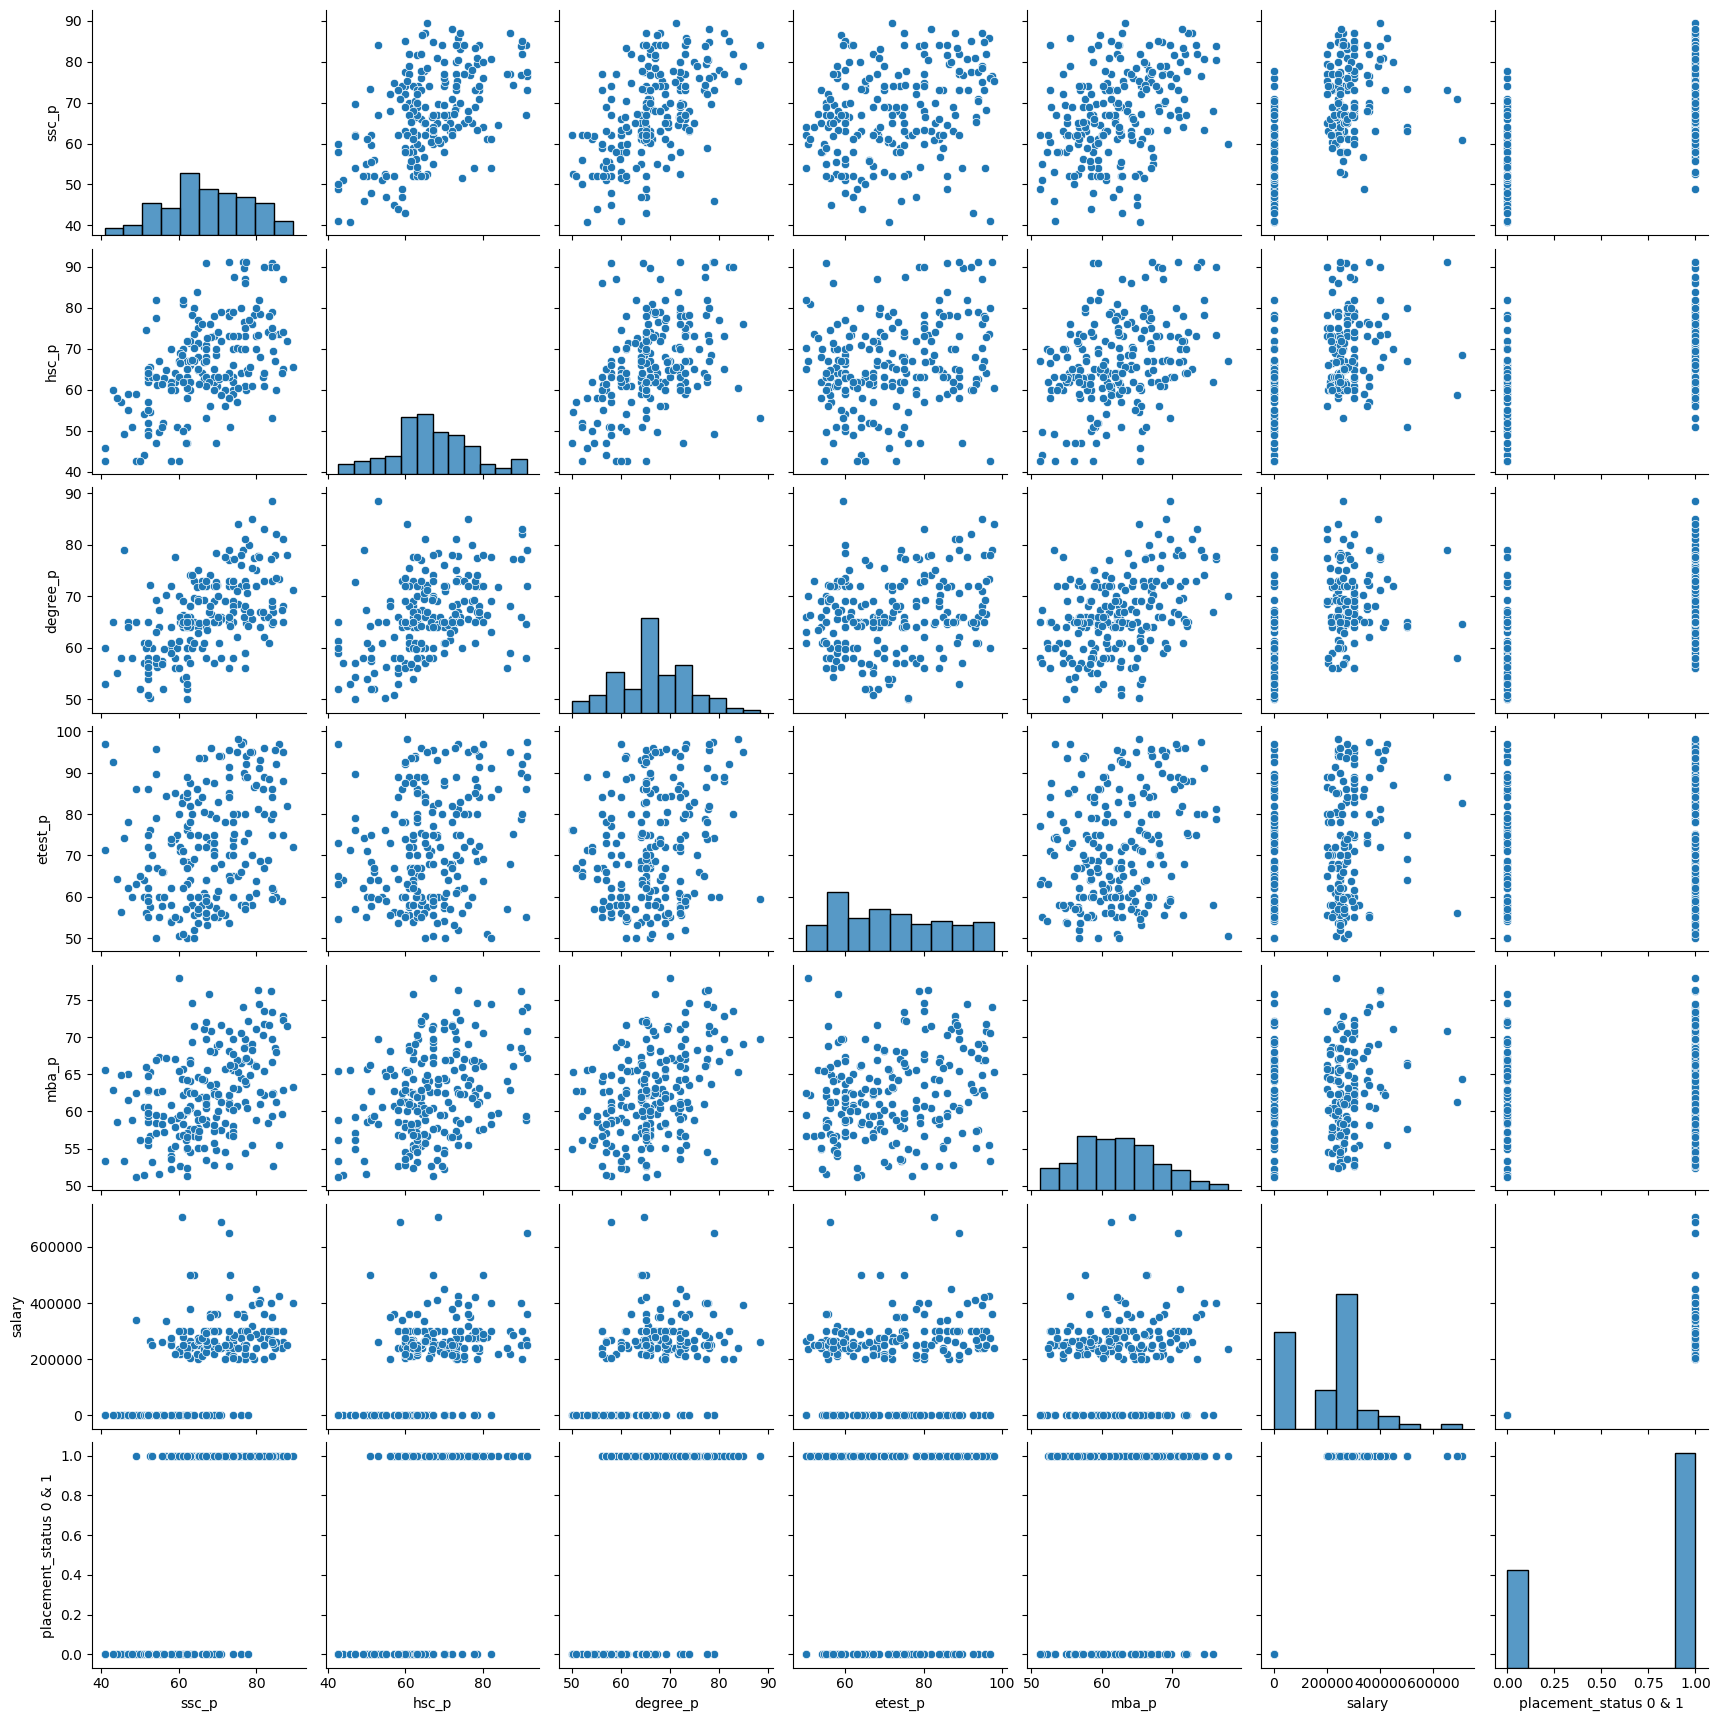

In [54]:
# (1) Approch 1
# Correation graph after converting Placement status "Yes" & "No" to binary values 1 & 0.
dataset["placement_status 0 & 1"] = dataset["status"].apply(lambda x: 0 if x == "Not Placed" else 1)

#To see the correlation in graph.
import seaborn as sns
sns.pairplot(dataset)

In [55]:
# The above corelation graph clearly tells that candiates who got more marks in mba were also not placed.
# so the acadamic scores can't be a only major reason for Non-placement.

In [56]:
# Approach (2)
# Use Independent Sample - Unpaired T test for mba_p Vs placed & not-placed candidates

from scipy.stats import ttest_ind
not_placed_mba = dataset[dataset["status"]=="Not Placed"]["mba_p"]
placed_mba = dataset[dataset["status"]=="Placed"]["mba_p"]
ttest_ind(not_placed_mba, placed_mba)


Ttest_indResult(statistic=-1.1259706009659818, pvalue=0.26144500197748627)

In [57]:
#T Test value is small. mba_p has more similarities between placed and not-placed candidates. it might not be the reason

In [58]:
# Approach (3)

# We can try to see using groupby funcion from pandas
# 'groupby' organizes your data into distinct groups based on unique combinations of values in the specified columns

# (i) Let's compare Work Experience and Placement
#Size tells the number of rows

dataset.groupby(["workex", "status"]).size()

workex  status    
No      Not Placed    57
        Placed        84
Yes     Not Placed    10
        Placed        64
dtype: int64

In [59]:
# when compring workex and placement status, it clearly tells that more Freshers got placed.

In [60]:
# (ii) Let's compare Specialization and Placement

dataset.groupby(["specialisation", "status"]).size()

specialisation  status    
Mkt&Fin         Not Placed    25
                Placed        95
Mkt&HR          Not Placed    42
                Placed        53
dtype: int64

In [61]:
# when comparing pecialization and Placement, many of the placed candiates are from  Mkt&Finance background.

# Final solution for question 3

#Acadamic scores are not the reason for non-placement.

#The major reasons might be "SPECIALIZATIONN" & "WORK EXP"

# 4) What kind of relation between salary and mba_p


In [62]:
# Let's drop placement status binary columns

dataset.drop("placement_status 0 & 1", inplace=True, axis=1)

# Let's find the corrrealtion

dataset.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [63]:
# The relation between mba_p & salary is 0.14 (i.e) 14 %. This is a positive correlation. 
#So mba_p mark is directly proportional to salary
# When mba_p mark gets increased, salary also gets increased by 14 %.
# When mba_p mark gets decreased, salary also gets decreased by 14 %.

# 5)Which specialization is getting minimum salary?

In [64]:
# Since we have already replaced the outliers by data preporecssing, we can find mean instaed of median.
#let's find mean salary for each specialization.
dataset["specialisation"].value_counts()


Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [65]:
salary_Mkt_Fin = dataset[dataset["specialisation"]=="Mkt&Fin"]["salary"]
salary_Mkt_Fin.mean()

234643.75

In [66]:
salary_Mkt_HR = dataset[dataset["specialisation"]=="Mkt&HR"]["salary"]
salary_Mkt_HR.mean()

150842.1052631579

In [67]:
print(f'Mkt&HR is getting minimum salary. The mean salary of the candidates from Mkt&HR is {salary_Mkt_HR.mean()} which is less than the mean slary of Mkt&Fin (i.e) {salary_Mkt_Fin.mean()}')

Mkt&HR is getting minimum salary. The mean salary of the candidates from Mkt&HR is 150842.1052631579 which is less than the mean slary of Mkt&Fin (i.e) 234643.75


# 6)How many of them getting above 500000 salary?

In [68]:
candidates_above_5L =(dataset["salary"] > 500000).sum()
print(f'{candidates_above_5L} candidates are getting salary above 5L')

3 candidates are getting salary above 5L


#  7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [69]:
# As we need to find difference between only the columns, we can use one way classification.

import scipy.stats as stats
stats.f_oneway(dataset['etest_p'], dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [70]:
# H0 = There is no significance difference between etest_p & mba_p marks.
# H1 = There is a significance difference between etest_p & mba_p marks.

#Here, p = 4.68 > 0.05 or 5% so we accept the null hypothesis H0 and reject alternate hypothessis H1

# The solution is....there is no signifacnce difference between etest_p & mba_p marks.


# 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [71]:
# Since it talks about siilarity, we can use T test.
# we have different groups & one condition.
# So we can go for Independent Sample - Unpaired T test

sci_tech_salary = dataset[dataset["degree_t"] =="Sci&Tech"]["salary"]
Mkt_HR_salary = dataset[dataset["specialisation"] =="Mkt&HR"]["salary"]

ttest_ind(sci_tech_salary, Mkt_HR_salary)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

In [72]:
# H0 = There is no similarity between salary of the candidates from Sci&Tech & Mkt&HR background
# H1 = There is a significance difference between salary of the candidates from Sci&Tech & Mkt&HR background.

# pvalue=0.007897969943471179 which is < 0,05 (i.e) 5% , so we reject the Null Hypothesis and accept the Alternate Hypothesis.

# Solution : here is a significance difference or less smilarities between salary of the candidates from Sci&Tech & Mkt&HR background.

# 9)Convert the normal distribution to standard normal distribution for salary column

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

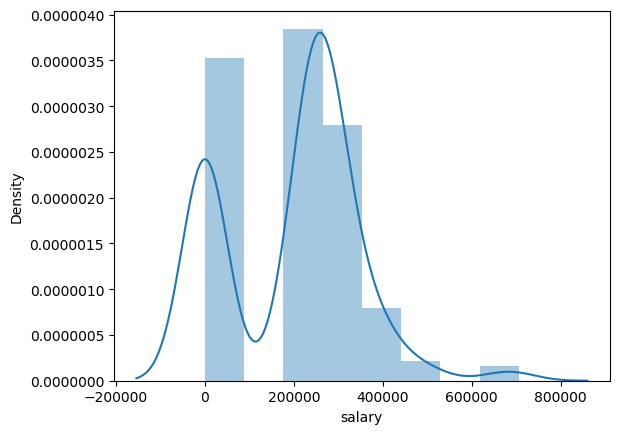

In [73]:
# Normal distribution
import seaborn as sns
sns.distplot(dataset["salary"])

C:\ARUN\HOPE AI\03_DataScience\DS Assignment\univariate.py:121: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True, color="Green", kde_kws = {"color" : "blue"})
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  

 The average z_score for salary is -1.115386852646669e-16


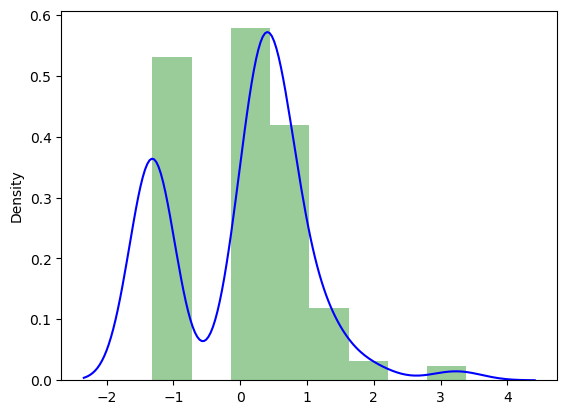

In [74]:
# Converting normal ditribution to standard normal distribution

# since we have wrintten function and ready in the univar class, we can use that here.
univar.stdNBgraph(dataset["salary"])

# 10)What is the probability Density Function of the salary range from 700000 to 900000?

C:\ARUN\HOPE AI\03_DataScience\DS Assignment\univariate.py:69: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Conve

Mean=197615.116, Standard deviation=150305.844
The area between range(700000,900000):0.0004137812663830048


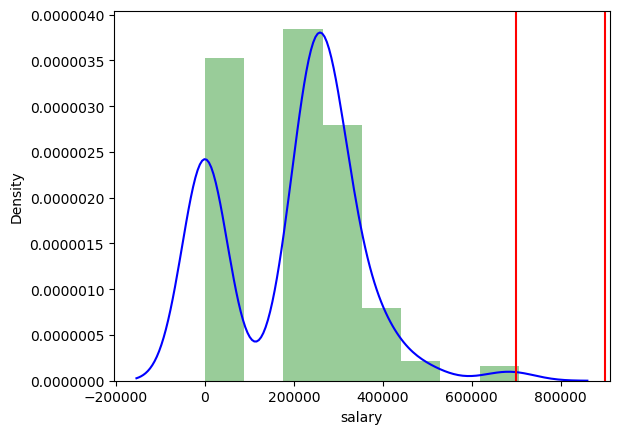

In [75]:
# For probablity density function also, we have written the function already. let's use it from univar class.

prob = univar.get_pdf_probability(dataset["salary"], 700000, 900000)

In [76]:
#Solution:

print(f"The probability Density Function of the salary range from 700000 to 900000 is {prob}")

The probability Density Function of the salary range from 700000 to 900000 is 0.0004137812663830048


# 11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [77]:
# T test will help to answer the question about "similarity"
# Here, we have one group but different conditions. so we can use "Dependent Sample-Paired T test"

from scipy.stats import ttest_rel
etest = dataset[dataset["degree_t"]=="Sci&Tech"]["etest_p"]
mba = dataset[dataset["degree_t"]=="Sci&Tech"]["mba_p"]
ttest_rel(etest, mba)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

In [78]:
# H0 : There are no similarities between the etest marks & mba_p marks of the condidates from Sci&Tech background.
# H1 : There are similarities between the etest marks & mba_p marks of the condidates from Sci&Tech background.

#Here, pvalue=5.518 > 0.05 or 5 %, so we can accept the null hypothesis.

#Solution: There are no similarities between the etest marks & mba_p marks of the condidates from Sci&Tech background.
    

# 12)Which parameter is highly correlated with salary?

In [79]:
# let's find corretaion for dataset. This correlarion function automatia=cally works only for quantitavive columns.
# Since we had already converted 
dataset.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [80]:
# As per the above correlation table, the parameter highly correlated with salary is "ss_p" mark. (i.e) 0.558475
# However, in general 0.558475 is low degree of positive correlation.
# So, ssc_p mark is directly proportional to salary
# When ssc_p mark gets increased, salary also gets increased by 55 %.
# When ssc_p mark gets decreased, salary also gets decreased by 55 %.

# 13) plot any useful graph and explain it.

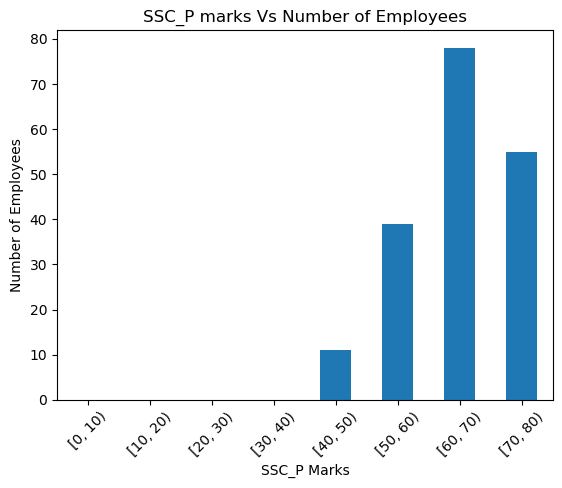

In [81]:
import matplotlib.pyplot as plt

dataset['binned_ssc_p'] = pd.cut(dataset['ssc_p'], bins=range(0, (int(dataset['ssc_p'].max()) + 1), 10), right=False)  # Group into intervals of 10
dataset['binned_ssc_p'].value_counts(sort=False).plot(kind='bar')

plt.title('SSC_P marks Vs Number of Employees')
plt.xlabel('SSC_P Marks')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # Rotate axis labels for better readability
plt.show()

In [82]:
# From teh above simple graph,

# There are no employees have go scored less than around 48.
# The highest number of employees (i.e) around 80 employees have scored ssc_p mark between 65 to 75.
# around 41 employees have scored marks between 55 to 65.
# Around 55 employees have higest marks in ssc_p (i.e) 75 to 90
# very less number employees (around 12) have performed below average in ssc. 
